In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

data = pd.read_csv('archive/KDDTrain+.txt', header=None)

# '정상(0)' 아니면 '공격(1)' 두 개로 통일
# 'normal'은 0, 나머지는 전부 1로 변환
y = data[41].apply(lambda x: 0 if x == 'normal' else 1)
y = np.array(y).reshape(-1, 1).astype('float32')

X = data.drop(41, axis=1)
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("=== 학습 시작! 정확도가 쑥쑥 올라갈 겁니다 ===")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


=== 학습 시작! 정확도가 쑥쑥 올라갈 겁니다 ===
Epoch 1/10


c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2835/2835 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9025 - loss: 3826.1052 - val_accuracy: 0.8676 - val_loss: 179.1389
Epoch 2/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9352 - loss: 4077.4460 - val_accuracy: 0.9564 - val_loss: 39.0432
Epoch 3/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9371 - loss: 5344.9419 - val_accuracy: 0.8942 - val_loss: 3997.7769
Epoch 4/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9284 - loss: 6803.0679 - val_accuracy: 0.9515 - val_loss: 7075.9985
Epoch 5/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9558 - loss: 2153.0544 - val_accuracy: 0.9567 - val_loss: 203.6565
Epoch 6/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9555 - loss: 12237.2588 - val_accuracy: 0.9605 - val_loss: 256.8838
Epoch 7/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9574 - loss: 6802.1343 - val_accuracy: 0.9531 - val_loss: 11337.9375
Epoch 8/10
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accura

788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step
[[12930   492]
 [  459 11314]]
              precision    recall  f1-score   support

   Normal(0)       0.97      0.96      0.96     13422
 Abnormal(1)       0.96      0.96      0.96     11773

    accuracy                           0.96     25195
   macro avg       0.96      0.96      0.96     25195
weighted avg       0.96      0.96      0.96     25195



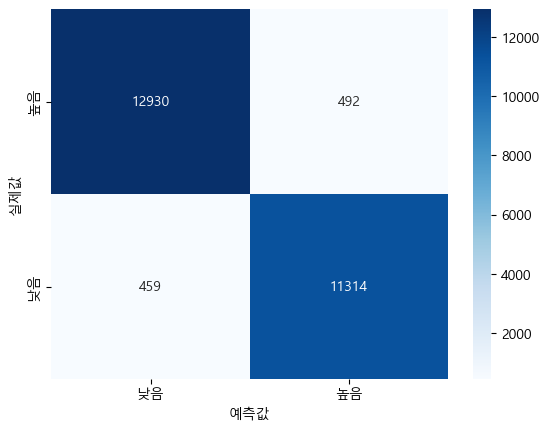

In [ ]:
# 모델 평가 및 시각화

y_pred = model.predict(X_test)
y_pred_labels = (y_pred.flatten() > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

print(classification_report(y_test, y_pred_labels, target_names=['Normal(0)', 'Abnormal(1)']))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['낮음', '높음'],
            yticklabels=['높음', '낮음'])
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()